In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from keras.metrics import MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import seaborn as sns

In [55]:
data = pd.read_csv('electricity_demand.csv')

In [67]:
df = data[['date', 'RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday', 'demand']]       

In [68]:
df['school_day'] = df['school_day'].map({'Y': 1, 'N': 0})
df['holiday'] = df['holiday'].map({'Y': 1, 'N': 0})

In [69]:
ms = MinMaxScaler()
df[['RRP', 'min_temperature', 'max_temperature','solar_exposure', 'rainfall', 'demand']] = ms.fit_transform(df[['RRP', 'min_temperature', 'max_temperature','solar_exposure', 'rainfall', 'demand']])

df['date'] = df['date'].astype('datetime64[ns]')

In [70]:
train_data = df[:int(0.90*(len(df)))]
test_data = df[int(0.90*(len(df))):]

In [71]:
prophet = Prophet(interval_width=0.95, seasonality_mode='multiplicative', n_changepoints=23, seasonality_prior_scale=10)

In [72]:
train_data.rename({'date':'ds', 'demand':'y'}, inplace = True, axis = 'columns')
test_data.rename({'date':'ds', 'demand':'y'}, inplace = True, axis = 'columns')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
prophet.add_regressor('min_temperature', standardize=False)
prophet.add_regressor('max_temperature', standardize=False)
prophet.add_regressor('solar_exposure', standardize=False)
prophet.add_regressor('rainfall', standardize=False)
prophet.add_regressor('RRP', standardize=False)
prophet.add_regressor('school_day', standardize=False)
prophet.add_regressor('holiday', standardize=False)

In [74]:
#Training the Multivariate model
prophet.fit(train_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
test_data_ = test_data.drop(columns = 'y')

In [76]:
#Predict for the test set
future = prophet.predict(test_data)

In [85]:
dfff = pd.DataFrame()
dfff['date'] = future['ds']
dfff['predicted'] = future['yhat']

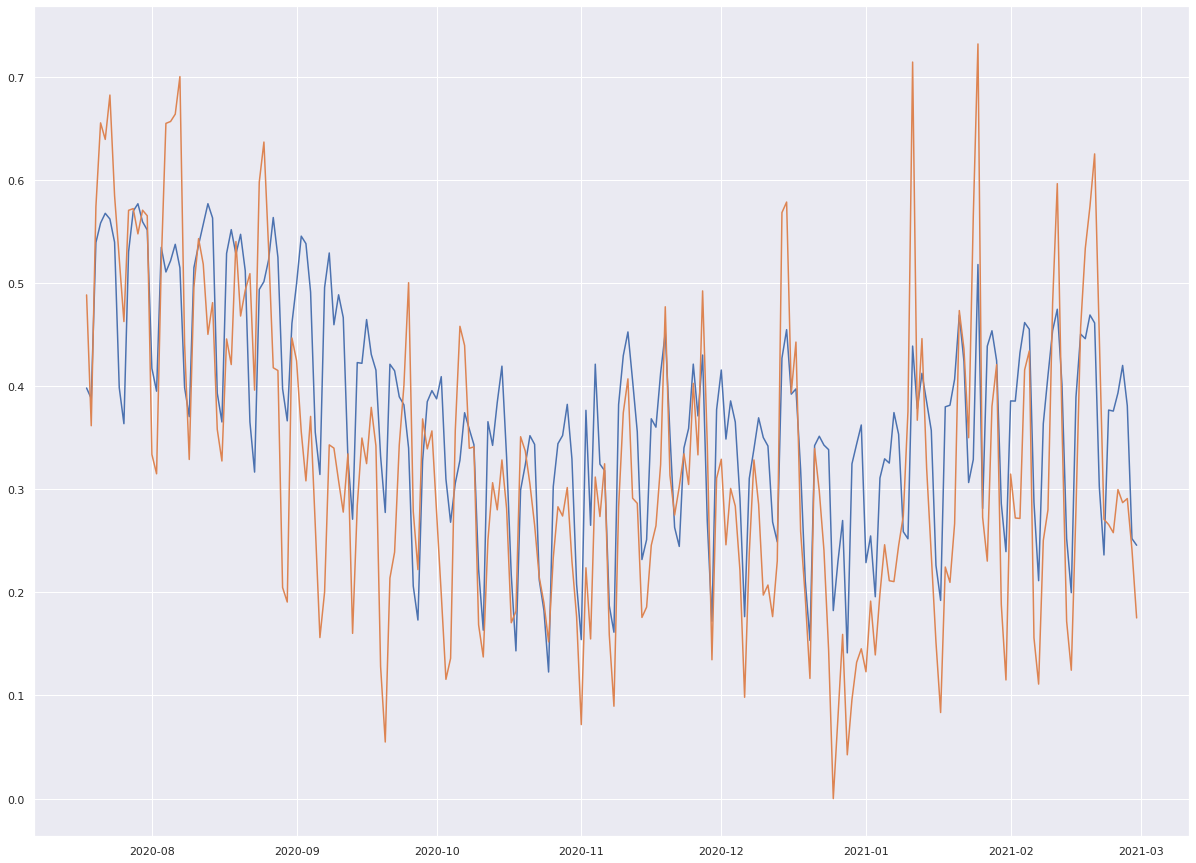

In [98]:
plt.plot(dfff['date'], dfff['predicted'])
plt.plot(dfff['date'], test_data['y'])

sns.set(rc={'figure.figsize':(20.7,20.27)})